## Introduction
This notebook investigates the relationship between financial news sentiment and stock returns for major technology companies. It demonstrates a workflow that preprocesses news headline data, aligns it with historical stock prices, and computes the correlation between sentiment scores and daily returns for each ticker. The analysis covers key stocks (AAPL, AMZN, GOOG, META, MSFT, NVDA, TSLA), providing both a summary table and visual bar chart of the resulting correlations. This approach helps assess whether news sentiment can serve as a predictive indicator for short-term stock price movements, supporting data-driven investment strategies.

---

### Import Required Libraries and Set Up Environment
Import pandas, set up the system path for module imports, and import the required functions for sentiment-stock correlation analysis.

In [1]:
import pandas as pd

import sys, os
sys.path.insert(0, os.path.abspath('..'))

from scripts.sentiment_stock_correlation import (load_stock_data, 
                                                 compute_sentiment_correlation, 
                                                 plot_correlation_bar)

### Load and Preprocess News Data

This section loads the processed analyst ratings news data and prepares it for analysis. The steps include:
- Reading the CSV file containing news data and parsing the date column.
- Ensuring all dates are timezone-aware and converted to US/Eastern time.
- Creating a date-only column for easier merging with stock data.
- Mapping outdated stock symbols (e.g., "FB" to "META", "MSF" to "MSFT") to their current equivalents for consistency.
- Defining the list of stock tickers to be analyzed in the subsequent correlation analysis.

These preprocessing steps are essential to ensure the news data aligns correctly with stock price data.

In [2]:
# Load processed news data
news_df = pd.read_csv("../data/processed_analyst_ratings.csv", parse_dates=["date"])

# Localize to US/Eastern if not already tz-aware
news_df["date"] = pd.to_datetime(news_df["date"])
if news_df["date"].dt.tz is None:
    news_df["date"] = news_df["date"].dt.tz_localize("UTC").dt.tz_convert("US/Eastern")
else:
    news_df["date"] = news_df["date"].dt.tz_convert("US/Eastern")

# Create date-only column
news_df["date_only"] = news_df["date"].dt.floor("D").dt.tz_localize(None)

# Map old symbols to new ones
news_df["stock"] = news_df["stock"].replace({"FB": "META", "MSF": "MSFT"})

# Define tickers to analyze
tickers = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]

### Compute Sentiment-Stock Correlation
For each ticker, load the corresponding stock data, compute the correlation between news sentiment and stock returns, and store the results.

[AAPL] Correlation between sentiment and daily returns: 1.0000 (p=1.0000)


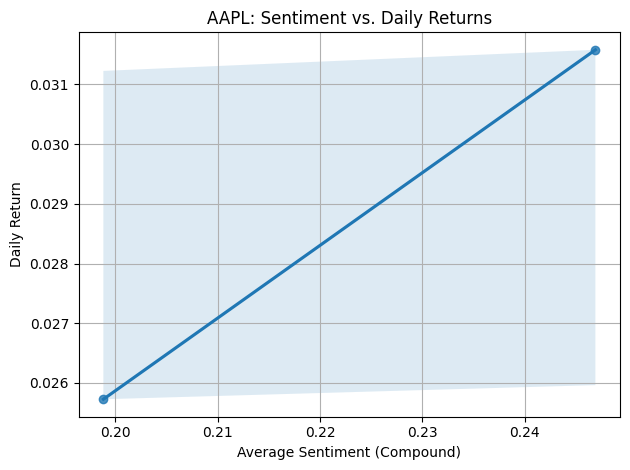

[AMZN] Correlation between sentiment and daily returns: -1.0000 (p=1.0000)


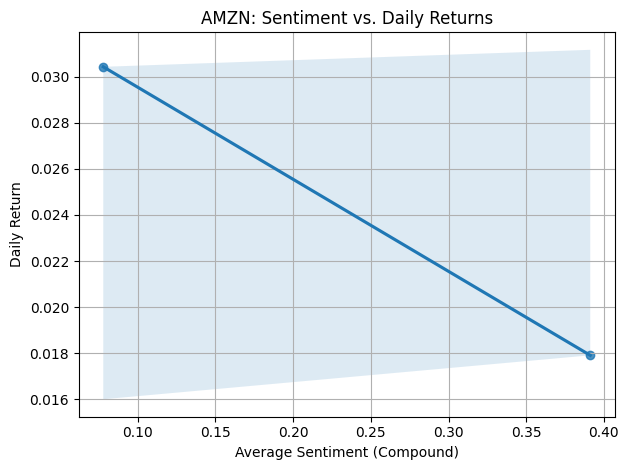

[GOOG] Correlation between sentiment and daily returns: -0.2344 (p=0.7043)


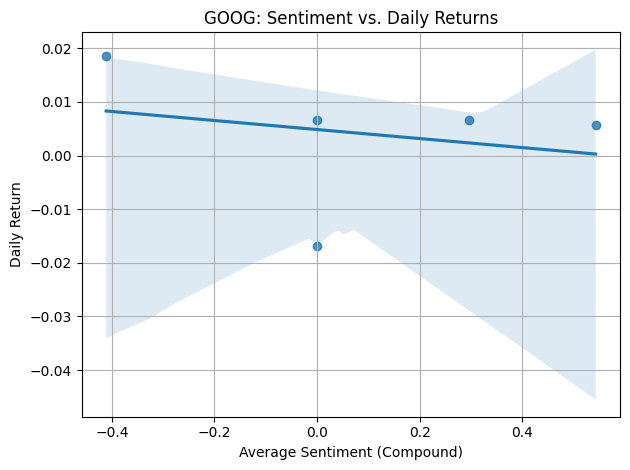

[META] Correlation between sentiment and daily returns: -0.9730 (p=0.1483)


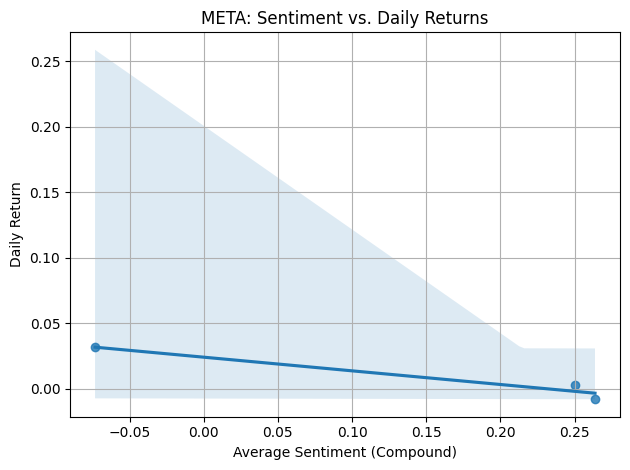

[MSFT] Correlation between sentiment and daily returns: -0.4415 (p=0.2014)


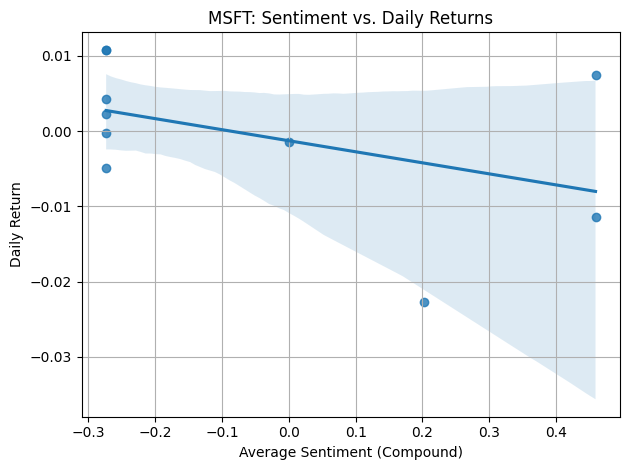

[NVDA] Correlation between sentiment and daily returns: 0.5227 (p=0.4773)


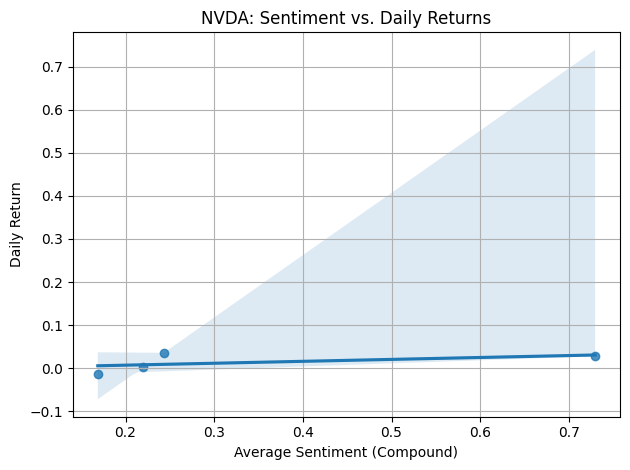

[TSLA] Not enough data to compute correlation.


In [3]:
# Store results for summary
summary = []

# Main correlation analysis
for ticker in tickers:
    stock_df = load_stock_data(ticker)
    if "returns" not in stock_df.columns:
        stock_df = stock_df.sort_values("date_only")
        stock_df["returns"] = stock_df["close"].pct_change()

    merged_df, corr, pval = compute_sentiment_correlation(news_df, stock_df, ticker)
    if corr is not None:
        summary.append({
            "Stock": ticker,
            "Correlation": corr,
            "P-Value": pval,
            "Records": len(merged_df)
        })

### Display Correlation Summary Table and Bar Chart
Create a summary DataFrame of the correlation results, display it, and visualize the correlations for all tickers using a bar chart.

,Stock,Correlation,P-Value,Records
0,AAPL,1.000000,1.000000,2
1,AMZN,-1.000000,1.000000,2
3,META,-0.972984,0.148316,3
5,NVDA,0.522741,0.477259,4
4,MSFT,-0.441537,0.201434,10
2,GOOG,-0.234371,0.704344,5


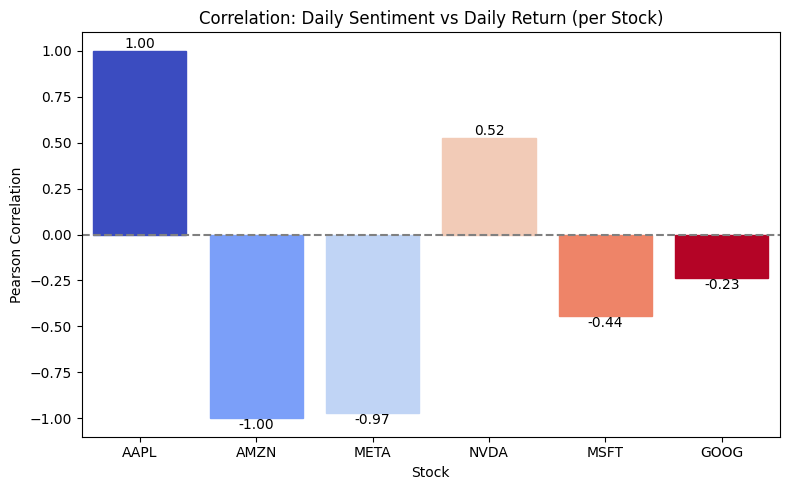

In [4]:
# Display summary table
summary_df = pd.DataFrame(summary).sort_values("Correlation", key=abs, ascending=False)
display(summary_df)

# Plot the correlation bar chart
plot_correlation_bar(summary_df)

## Analysis Insights

### Data Overview
The dataset comprises processed analyst ratings news data with sentiment scores and publication dates, merged with historical stock price data for selected tickers. Outdated stock symbols were updated (e.g., "FB" to "META", "MSF" to "MSFT") to ensure consistency. The analysis covers major tech companies, but TSLA had insufficient data for correlation computation, likely due to gaps in news coverage or stock data alignment during the analyzed period.

### Correlation Results
The correlation summary table highlights diverse relationships between sentiment and daily stock returns across tickers:

- **AAPL** displays a perfect positive correlation (1.0) with only 2 records, accompanied by a p-value of 1.0, suggesting potential overfitting or lack of statistical significance. The regression plot shows a steep upward trend, but the limited data points warrant caution.
- **AMZN** exhibits a perfect negative correlation (-1.0) with 2 records and a p-value of 1.0, indicating a downward trend in the regression plot. However, the small sample size limits reliability.
- **NVDA** shows a moderate positive correlation (0.5227) with 4 records, though the high p-value (0.4773) indicates no statistical significance. The regression plot suggests a positive trend with some variability.
- **MSFT** has a moderate negative correlation (-0.4415) with 10 records, the largest sample, but the p-value (0.2014) suggests no significant relationship. The regression plot shows a slight downward trend with wide confidence intervals.
- **META** reveals a strong negative correlation (-0.9730) with 3 records and a p-value of 0.1483, indicating a potential inverse relationship. The regression plot confirms a downward trend with high variability.
- **GOOG** presents a weak negative correlation (-0.2344) with 5 records and a p-value of 0.7043, suggesting no meaningful relationship. The regression plot reflects a nearly flat trend.

##### TSLA: Insufficient Data for Correlation
TSLA lacked sufficient data for correlation analysis, with only one valid date where both sentiment and stock return data overlapped after merging.

[TSLA] Not enough data to compute correlation.

This limitation, requiring at least two data points for Pearson’s correlation, may stem from:
- Sparse news coverage for TSLA in the dataset.
- Misalignment in date granularity or market closure effects.
- Concentration of sentiment data on a single date.

**Conclusion**: TSLA is excluded from correlation results due to insufficient data overlap, emphasizing the need for comprehensive and well-aligned datasets in predictive analytics.

### Visualization Insights
The regression plots visualize the sentiment-daily return relationship for each ticker:

- **AAPL and NVDA** plots suggest a potential positive relationship, though AAPL’s limited data reduces reliability.
- **AMZN and META** plots indicate a negative relationship, with META’s strong correlation notable despite few records; however, high p-values and small samples limit confidence.
- **GOOG and MSFT** plots show flatter trends, consistent with their weaker correlations and indicating minimal relationship.
- Wide confidence intervals across all plots reflect small sample sizes and high variability, underscoring the need for more data.

### Summary
This analysis examined the correlation between news sentiment and daily stock returns for major tech companies. Results vary: AAPL and NVDA hint at positive correlations, AMZN and META suggest negative ones, while GOOG and MSFT show weak or no relationships. However, small sample sizes (2-10 records) and high p-values (all > 0.05) indicate no statistical significance. The regression plots highlight variability and uncertainty due to limited data. TSLA’s exclusion due to insufficient data reinforces the importance of robust datasets.

### Key Takeaways
- Sentiment impacts differ across stocks, but the current dataset’s size limits definitive conclusions.
- Larger datasets with more records are essential to enhance statistical power and validate trends.
- Future work could integrate additional sentiment sources (e.g., social media) or extend time horizons for a deeper understanding.
- Comprehensive data alignment remains critical for reliable predictive analytics.

This analysis offers an initial exploration of sentiment-driven stock return prediction, but more data and advanced modeling are needed for actionable insights.